In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# empezamos por el oscilador armonico
def dvdt(x, v, m=1.0, k=1.0, gamma=0.0):
    return -(k/m)*x - gamma*v

# https://en.wikipedia.org/wiki/Leapfrog_integration
def leapfrog_step(x, v, t, delta_t, m=1.0, k=1.0, gamma=0.0):
    v_half = v + 0.5 * dvdt(x, v, m=m, k=k, gamma=gamma) * delta_t #kick
    x_new = x + v_half * delta_t # drift
    v_new = v + 0.5 * dvdt(x_new, v_half, m=m, k=k, gamma=gamma) * delta_t #kick
    t_new = t + delta_t
    return x_new, v_new, t_new

In [16]:
def solve_mas(x_0=0.0, v_0=0.0, t_0=0.0, delta_t=1E-2, n_steps=10, k=1.0, m=1.0, gamma=0.0):
    x = [x_0]
    v = [v_0]
    t = [t_0]
    for i in range(n_steps):
        x_new, v_new, t_new = leapfrog_step(x[-1], v[-1], t[-1], delta_t, m=m, k=k, gamma=gamma)
        x.append(x_new)
        v.append(v_new)
        t.append(t_new)
    return x, v, t

In [17]:
x, v, t = solve_mas(x_0=0.1, delta_t=1E-3, n_steps = 50000)

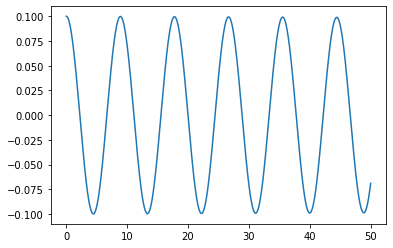

In [18]:
plt.plot(t, x)

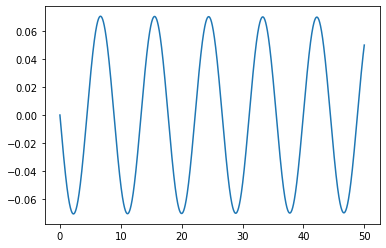

In [19]:
plt.plot(t, v)

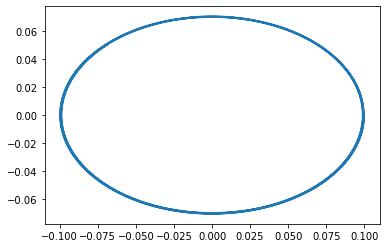

In [20]:
plt.plot(x, v)

In [21]:
x, v, t = solve_mas(x_0=0.1, delta_t=1E-3, gamma=0.25, n_steps = 50000)

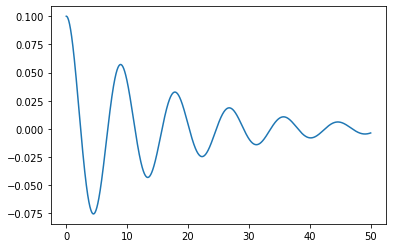

In [22]:
plt.plot(t, x)

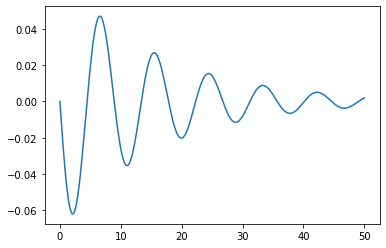

In [23]:
plt.plot(t, v)

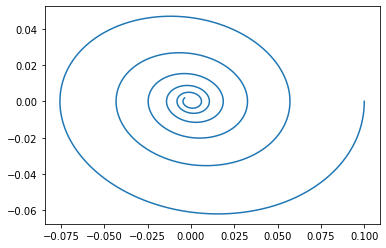

In [24]:
plt.plot(x, v)

In [25]:
x_A, v_A, t = solve_mas(x_0=0.1, delta_t=1E-3, gamma=0.25, n_steps = 50000)
x_B, v_B, t = solve_mas(x_0=0.1, delta_t=1E-3, gamma=2.0, n_steps = 50000)
x_C, v_C, t = solve_mas(x_0=0.1, delta_t=1E-3, gamma=10.0, n_steps = 50000)

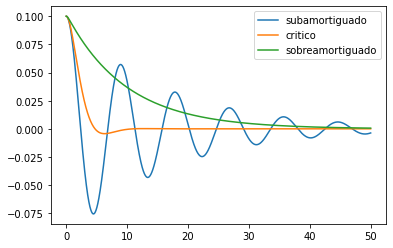

In [26]:
plt.plot(t, x_A, label='subamortiguado')
plt.plot(t, x_B, label='critico')
plt.plot(t, x_C, label='sobreamortiguado')
plt.legend()